# ***3. Distributions***

> ## **3.1 Distributions and PMF's**
***

- In statistics a distribution is a set of possible outcomes and their corresponding probabilities.

To represent distributions, I’ll be using a library called `empiricaldist`. An empirical distribution is based on data, as opposed to a theoretical distribution. `empiricaldist` provides a class called `Pmf` that represents a probability mass function. To use `Pmf` I'll download the library, import the class and represent the PMF of a coin toss:

In [40]:
import sys
IN_COLAB = 'google.colab' in sys.modules

# Get utils.py
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

from utils import set_pyplot_params
set_pyplot_params()

from empiricaldist import Pmf

In [41]:
# Create the PMF object.
coin = Pmf()

# Assign probabilities assuming a fair coin.
coin['heads'] = 1/2
coin['tails'] = 1/2

'''
coin = Pmf.from_seq(['heads', 'tails']) # This is a way to simplify the previous lines
'''
coin

,probs
heads,0.5
tails,0.5


- Pmf creates an empty `Pmf` with no outcomes. Then we can add new outcomes using the bracket operator.

- The `Pmf` class inherits from a Pandas `Series`, so anything you can do with a `Series`, you can also do with a `Pmf`.

In [42]:
# Create the PMF object.
letters = Pmf()

# Assign probabilities (rather quantities)
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [43]:
# You can use the bracket operator to look up a quantity and get the corresponding probability.
print(letters['s'])
# You can also call a Pmf as if it were a function, with a letter in parentheses and does exactly the same.
print(letters('s'))

0.36363636363636365
0.36363636363636365


<div class="alert alert-block alert-info">
<b>Reminder:</b> Note that you can also provide a sequence of quantities and get a sequence of probabilities as an array.
</div>

> ## **3.2 The Cookie Problem (once again)**
***

Here's a `Pmf` that represents the two hypotheses and their prior probabilities:

In [44]:
# Create the PMF object.
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


To update the distribution based on new data (the vanilla cookie), we multiply the priors by the likelihoods.

In [45]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


The result is the unnormalized posteriors; i.e., they don't add up to 1. We can use `normalize`, which is a method provided by `Pmf` and get the total probability of the data (picking a vanilla cookie).

In [46]:
posterior.normalize()

0.625

And then just call `posterior` to see the separated probabilities.

In [47]:
print("Probability of getting a vanilla cookie from Bowl 1: ", posterior('Bowl 1'))
posterior

Probability of getting a vanilla cookie from Bowl 1:  0.6


,probs
Bowl 1,0.6
Bowl 2,0.4


One benefit of using `Pmf` objects is that it is easy to do successive updates with more data.
For example, suppose you put the first cookie back (so the contents of the bowls don't change) and draw again from the same bowl.
If the second cookie is also vanilla, we can do a second update like this:

In [48]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


Now the posterior probability for Bowl 1 is almost 70%.
But suppose we do the same thing again and get a chocolate cookie. 

In [49]:
# Likelihood for the new data
likelihood_chocolate = [0.25, 0.5]

posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


Now the posterior probability for Bowl 1 is about 53%. After two vanilla cookies and one chocolate, the posterior probabilities are close to 50/50.

> ## **3.3 The 101 Bowls**
***

> As in the previous version, there are only two kinds of cookies, 
> vanilla and chocolate and let's assume Bowl 0 is all chocolate 
> cookies, Bowl 0 is 100% chocolate, Bowl 1 is 99% chocolate, 
> therefore, Bowl 0 contains no  vanilla cookies, Bowl 1 is 1% vanilla and so on.
>
>Suppose we choose a bowl at random, choose a cookie at random, and it 
> turns out to be vanilla.  What is the probability that the cookie 
> came from Bowl $x$, for each value of $x$?

In [54]:
# I'll use an array that represents the 101 hypotheses.

import numpy as np
hypotheses = np.arange(101)

# We can use the array to make the prior distribution.
prior = Pmf(1,hypotheses) # 1 = prior, 'hypotheses' = quantities. 
print(prior) # The values are just raw weights rather than probabilities that sum to 1.
prior.normalize() # Each weight of the array is divided by the sum of all weights and returns the sum of the original unnormalized weights.
prior.head()

0      1
1      1
2      1
3      1
4      1
      ..
96     1
97     1
98     1
99     1
100    1
Length: 101, dtype: int64


,probs
0,0.009901
1,0.009901
2,0.009901


<div class="alert alert-block alert-info">
<b>Reminder:</b> Note that we can initialize a Pmf with two parameters. The first parameter is the prior probability; the second parameter is a sequence of quantities.
</div>

The likelihood of the data is the fraction of vanilla cookies in each bowl, which we can calculate using `hypotheses`:

In [59]:
# This is an element-wise division for each index in the array.print
likelihood_vanilla = hypotheses/100
print("Percentage of vanilla in each bowl: ", likelihood_vanilla[:5] , "...")

Percentage of vanilla in each bowl:  [0.   0.01 0.02 0.03 0.04] ...


Now we can compute the posterior distribution in the usual way:

In [65]:
posterior1 = prior * likelihood_vanilla
print("Normalization constant: ", posterior1.normalize())
posterior1.head()

Normalization constant:  0.5000000000000001


,probs
0,0.000000
1,0.000198
2,0.000396


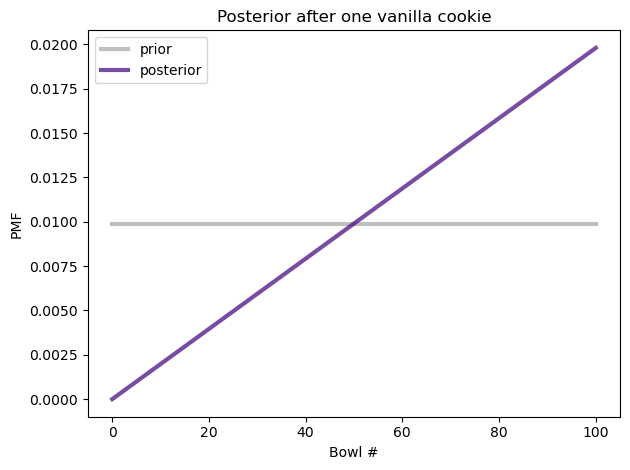

In [74]:
from utils import decorate

def graph_bowls(title):
    decorate(xlabel='Bowl #',
             ylabel='PMF',
             title=title)
    
prior.plot(label='prior', color='C5')
posterior1.plot(label='posterior', color='C4')
graph_bowls('Posterior after one vanilla cookie')

The posterior probability of Bowl 0 is 0 because it contains no vanilla cookies. The posterior probability of Bowl 100 is the highest because it contains the most vanilla cookies. In between, the shape of the posterior distribution is a line because the likelihoods are proportional to the bowl numbers.

Now suppose we put the cookie back, draw again from the same bowl, and get another vanilla cookie. Here’s the update after the second cookie:

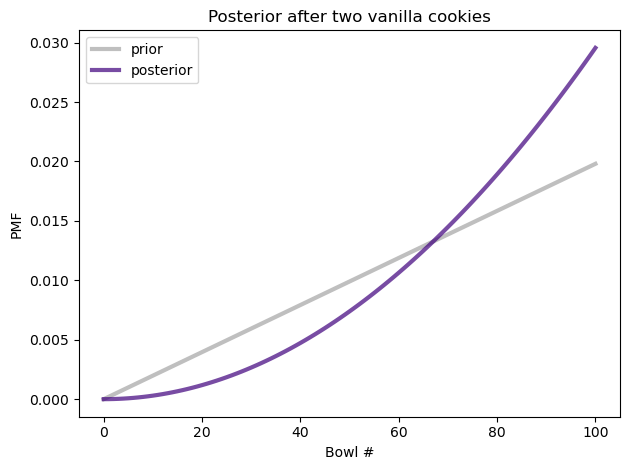

In [76]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()
posterior1.plot(label='prior', color='C5')
posterior2.plot(label='posterior', color='C4')
graph_bowls('Posterior after two vanilla cookies')


Suppose we draw again and get a chocolate cookie. Here’s the update:

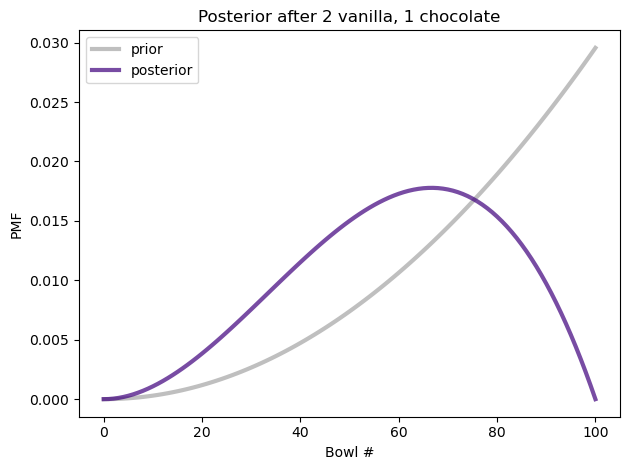

In [77]:
likelihood_chocolate = 1 - hypotheses/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()
posterior2.plot(label='prior', color='C5')
posterior3.plot(label='posterior', color='C4')
graph_bowls('Posterior after 2 vanilla, 1 chocolate')

The probability of Bowl 100 drops to zero after observing a chocolate cookie because that bowl has 0% chocolate. Bayesian updating eliminates impossible hypotheses when new evidence contradicts them. The posterior distribution tells us that given the cookies we've drawn (2 vanilla, 1 chocolate), how likely is each bowl to be the one we picked from?

It is not just about vanilla cookies anymore, it considers all the evidence (both vanilla and chocolate).

The fact that the peak of the posterior distribution is at Bowl 67 means that Bowl 67 is the most likely bowl we picked from, given the 3 samples is because Bowl 67 has a vanilla-to-chocolate ratio that matches the observed data (i.e., 2 vanilla, 1 chocolate ≈ 67% vanilla).

* The quantity with the highest posterior probability is called the MAP

To compute the MAP, we can use the `Series` method `idxmax` or `Pmf` provides a more memorable name for the same thing:

In [80]:
posterior3.idxmax()
posterior3.max_prob()

67

This example isn’t really about bowls; it’s about estimating proportions. If you have one bowl of cookies, you may not know what fraction of cookies are vanilla, but you think it is equally likely to be any fraction from 0 to 1. If you draw three cookies and two are vanilla, what proportion of cookies in the bowl do you think are vanilla? The posterior distribution we just computed is the answer to that question.

The `Pmf` object has two attributes:

* `qs` contains the quantities in the distribution;

* `ps` contains the corresponding probabilities.

In [84]:
print(prior.qs[:5])
print(prior.ps[:5])

[0 1 2 3 4]
[0.00990099 0.00990099 0.00990099 0.00990099 0.00990099]


> **Exercise:**
> _Suppose I have two sock drawers. One contains equal numbers of black and white socks. The other contains equal numbers of red, green, and blue socks_
> _Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair. What is the probability that the socks are white?_
> _For simplicity, let’s assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions._

In [88]:
# In the BlackWhite drawer, the probability of getting a match is 1/2
# In the RedGreenBlue drawer, the probability of a match is 1/3

hypos = ['BlackWhite', 'RedGreenBlue']
prior = Pmf(1/2, hypos)
likelihood = 1/2, 1/3
posterior = prior * likelihood
print(posterior.normalize())
posterior

# If I drew from the BlackWhite drawer, the probability the socks are white is 1/2 so 0.6 / 2 = 0.3

0.41666666666666663


,probs
BlackWhite,0.6
RedGreenBlue,0.4


> **Exercise:**
> _Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?_

In [91]:
hypos = ['Fraternal', 'Identical']
prior = Pmf([2/3, 1/3], hypos)
likelihood = 1/2, 1
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
Fraternal,0.5
Identical,0.5


It's 50/50 so I guess we'll never know.